# Purpose of Project: 

Sarcasm is something we use in face-to-face conversations to make light of a situation or joke around with friends. We know something/someone is sarcastic from their facial expressions, tone of voice, and perhaps the way they phrase their sentiments. However, this is dificult to detect over text or other forms of media since there is only the physical text we have. Because of this, people mistakenly misunderstand one another which leads to uneccesary conflicts. 

By creating this NLP project, I hope to identify a way to determine sarcastic comments by identifying what words are common in sarcastic comments. I will first run a portion of th edataset to train my model to learn words common in sarcastic comments then run a new batch of the sarcastic comments dataset to see if my theory holds true.

# Traning Dataset



# Analyze Data

In [1]:
# training data
import pandas as pd
import numpy as np

pd.options.display.max_columns
pd.set_option("display.max_colwidth",-1)

df_train = pd.read_csv("train.csv")
df_train

C:\Users\journ\AppData\Local\Temp\ipykernel_10520\1871648106.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1)


,Y,text
0,1,thirtysomething scientists unveil doomsday clock of hair loss
1,0,dem rep totally nails why congress is falling short on gender racial equality
2,0,eat your veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting to work
4,1,mother comes pretty close to using word streaming correctly
...,...,...
20028,1,tollbooth attendant wishes just one high speed chase would crash through entry bar
20029,0,emotional intelligence needs moral rudder
20030,1,man putting off starting family to focus on treading water in career for few years
20031,0,the 8 most important lessons from my first year out of college


In [2]:
# Identify any na values
count_na = df_train.isnull().sum()
count_na

Y       0
text    0
dtype: int64

In [3]:
#get number of points

df_train.shape

(20033, 2)

Results below show near 50:50 data split, so fair classification training set for our model

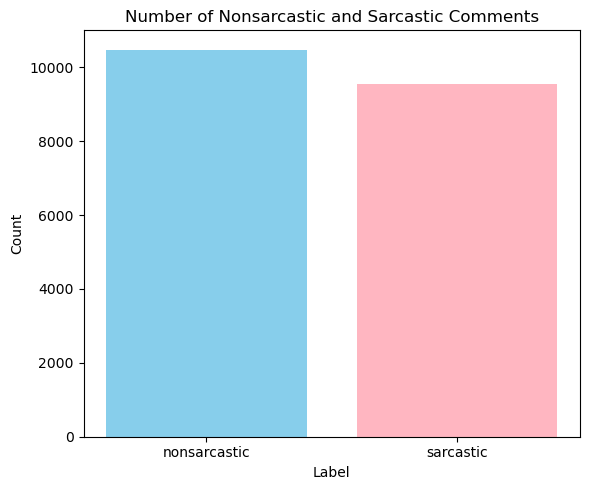

In [4]:
#distribution of sarcasm/non-sarcasm
import matplotlib.pyplot as plt

# Assuming the first column contains the labels (good or bad)
labels = df_train.iloc[:, 0]

# Count the number of SARCASTIC/NONSARCASTIC
nonsarcastic = (labels == 0).sum()
sarcastic = (labels == 1).sum()

# Create a list for categories
categories = ["nonsarcastic", "sarcastic"]

# Create a list for counts
counts = [nonsarcastic, sarcastic]

# Create the bar chart
plt.figure(figsize=(6, 5)) 
plt.bar(categories, counts, color=['skyblue', 'lightpink'])  
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Nonsarcastic and Sarcastic Comments")
plt.xticks(rotation=0)  
plt.tight_layout()


plt.show()

In [5]:
# preprocess
#text feature engineer
# one method? or ensemble?

## Preprocessing

1) Tokenization

chunk words in sentences into seperate entities.

In [6]:
import os
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


ps = PorterStemmer()

2) Stemming

Stemming - get root word (running -> run)

Lemmentizing - root work from various forms of word (ran -> run , running -> run)

Removing stop words

In [7]:
# finds important words in dataset tweets and stores them into array
# drops stop words

corpus = []
import re

#goes up to length of dataset
for i in range(len(df_train["text"])):
    train_text = re.sub('[^a-zA-Z]',' ',df_train["text"][i])
    train_text = train_text.lower()
    train_text = train_text.split()
    clean_review = [ps.stem(word) for word in train_text if not word in set(stopwords.words('english'))]
    clean_review = ' '.join(clean_review)
    corpus.append(clean_review)
    


In [8]:
# view cleaned text first and second row
corpus[0]


'thirtysometh scientist unveil doomsday clock hair loss'

In [9]:
corpus[1]

'dem rep total nail congress fall short gender racial equal'

3) Text Feature Extraction

This step includes converting the comments themselves to numerical data. I used TF-IDF (Term Frequency-Inverse Document Frequency), which gives a value to each word in a text from 0 to 1 to determine its importance. Other feature extraction methods can be used [here](https://medium.com/@eskandar.sahel/exploring-feature-extraction-techniques-for-natural-language-processing-46052ee6514)

Why I used TF-IDF: it determines importance of word in my collection of texts based on its frequency in both the singular text and collection of texts. This also accounts for all words by assigning them a value ranging from 0 - 1 instead of prioritizing top x words.

In [10]:
# #method 1 - from my COVID_Tweet_NLP project

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=2000, min_df=2, max_df = .6) #means "ignore terms that appear in less than 2 messages". use integer or decimal (percentage)?
# #max_features = how many words we want to collect
# #max_df = gets rid of words occuring in x% of documents

# X = vectorizer.fit_transform(corpus).toarray() #comments to number

# X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.46702837]])

In [22]:
# #method 2 - from eskandar.sahel

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(corpus)
print('TF-IDF:')
print(tfidf_vec.get_feature_names_out()[:10])
print(X_tfidf.toarray()[0][:10])

X = tfidf_vec.fit_transform(corpus).toarray()

TF-IDF:
['aaa' 'aaron' 'aarp' 'aatish' 'ab' 'abandon' 'abaya' 'abba' 'abbey'
 'abbi']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
y = df_train.iloc[ : , 0].values
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

## Running Preprocessed Data - Random Forrest (RF)

Why use RF: It makes multiple trees that model out the many different paths it can take to classify input material. The classification that the most number of decision treees lead to is the final classification that the model predicts.
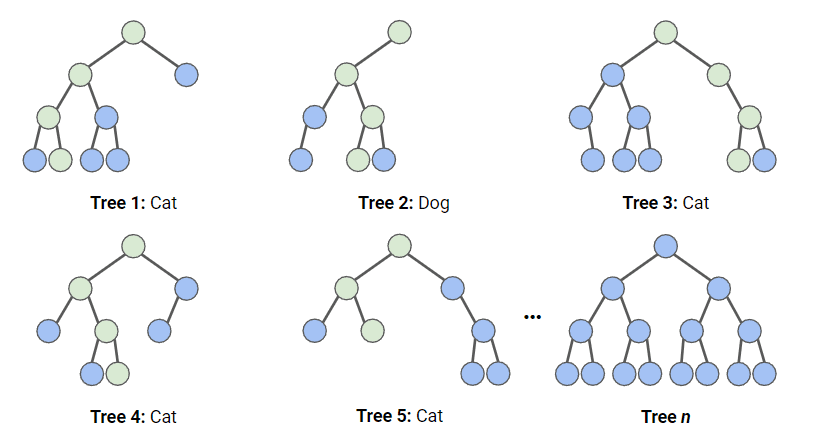

Credit: Datacamp

In [14]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# cross validation score
labels = df_train.Y
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
]

cross_value_scored = []
for model in models:
    model_name = model.__class__.__name__
    accuracies= cross_val_score(model, X, labels, scoring = 'accuracy', cv = 5)
    for accuracy in accuracies:
        cross_value_scored.append((model_name, accuracy))

In [24]:
# make a dataframe of cross_val_scor
df_cv = pd.DataFrame(cross_value_scored, columns =['model_name', 'accuracy'])
acc = pd.concat([df_cv.groupby('model_name').accuracy.mean(),df_cv.groupby('model_name').accuracy.std()], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
RandomForestClassifier,0.565865,0.010628
